In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os.path

from os import getcwd
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
import math
from scipy.fftpack import fft, ifft
from scipy.stats import zscore, f_oneway
#import samplerate
import multiprocessing as mp
from scipy.signal import resample
import random
import pyreadr
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import NMF
import scipy.cluster.hierarchy as hac 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.express as px

In [2]:
def zscore_bseline(input_mat):
    use_unit_z = np.zeros(input_mat.shape)
    for item in range(input_mat.shape[0]):
        use_unit = input_mat[item]
        unit_baseline = use_unit[0:1500]
        unit_baseline_mean = np.mean(unit_baseline)
        unit_baseline_std = np.std(unit_baseline)
        use_unit_z[item] = (use_unit - unit_baseline_mean)/unit_baseline_std
    return use_unit_z

In [3]:
all_hg_ave_activity = loadmat("processed_data/all_cue_ecog.mat")
ecog_hg_onset_mean = all_hg_ave_activity['ecog_hg_onset_mean']
ecog_hg_onset_sem = all_hg_ave_activity['ecog_hg_onset_sem']
ecog_hg_sus_mean = all_hg_ave_activity['ecog_hg_sus_mean']
ecog_hg_sus_sem = all_hg_ave_activity['ecog_hg_sus_sem']
ecog_hg_three_mean = all_hg_ave_activity['ecog_hg_three_mean']
ecog_hg_three_sem = all_hg_ave_activity['ecog_hg_three_sem']

In [4]:
ecog_hg_onset_red = np.repeat('red', ecog_hg_onset_mean.shape[0])
ecog_hg_sus_green = np.repeat('green', ecog_hg_sus_mean.shape[0])
ecog_hg_three_blue = np.repeat('blue', ecog_hg_three_mean.shape[0])

ecog_hg_color = np.concatenate((ecog_hg_onset_red, ecog_hg_sus_green, ecog_hg_three_blue))

In [5]:
ecog_hg_mean = np.concatenate((ecog_hg_onset_mean, ecog_hg_sus_mean, ecog_hg_three_mean))
ecog_hg_mean.shape

(220, 5000)

In [6]:
use_cmap = sns.diverging_palette(220, 20, as_cmap=1, sep=125)


In [7]:
fig, axs = plt.subplots(1, 1, figsize=(6, 5), dpi=200, constrained_layout=True)
sns.heatmap(zscore_bseline(ecog_hg_mean), cmap=use_cmap, cbar=False, 
            vmax=3, vmin=-3, ax=axs, yticklabels=False, xticklabels=500)

<Axes: >

In [8]:
ecog_hg_onset_red = np.repeat('Onset', ecog_hg_onset_mean.shape[0])
ecog_hg_sus_green = np.repeat('Sustained', ecog_hg_sus_mean.shape[0])
ecog_hg_three_blue = np.repeat('Syllable', ecog_hg_three_mean.shape[0])

ecog_hg_color = np.concatenate((ecog_hg_sus_green, ecog_hg_onset_red, ecog_hg_three_blue))

In [9]:
from matplotlib import patches

In [10]:
leveles, categories = pd.factorize(ecog_hg_color)
colors = [plt.cm.tab10(i) for i in leveles]
handles = [patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

Text(0.5, 0, 'Component 1')

Text(0, 0.5, 'Component 2')

Text(0.5, 1.0, 'Non-negative \nmatrix factorization')

[Text(0, -2.0, '-2.0'),
 Text(0, 0.0, '0.0'),
 Text(0, 2.0, '2.0'),
 Text(0, 4.0, '4.0'),
 Text(0, 6.0, '6.0'),
 Text(0, 8.0, '8.0')]

[Text(0.0, 0, '0.0'),
 Text(2.5, 0, '2.5'),
 Text(5.0, 0, '5.0'),
 Text(7.5, 0, '7.5'),
 Text(10.0, 0, '10.0')]

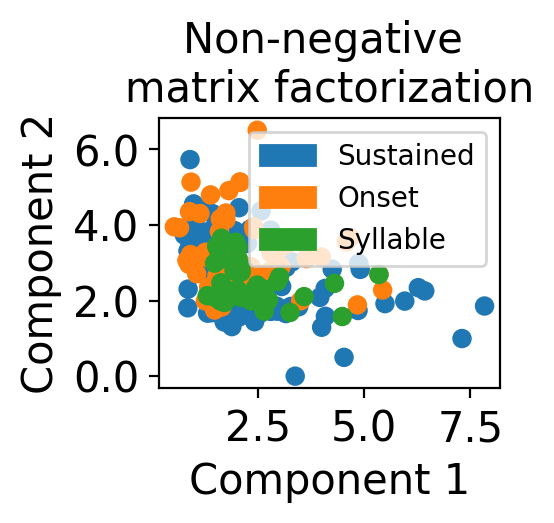

In [30]:
fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(2.5, 2.5), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

NMF_input = zscore_bseline(ecog_hg_mean)[:, 1500:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=2, init='random', random_state=0)
NMF_output = model.fit_transform(NMF_input)

axs.scatter(NMF_output[:, 0], NMF_output[:, 1], c=colors)
axs.legend(handles=handles)
axs.set_xlabel('Component 1', fontsize=15)
axs.set_ylabel('Component 2', fontsize=15)
axs.set_title('Non-negative \nmatrix factorization', fontsize=15)
axs.set_yticklabels(axs.get_yticks(), fontsize=15)
axs.set_xticklabels(axs.get_xticks(), fontsize=15)

#plt.savefig("../plots/fig3c.svg", format = 'svg', dpi=200);


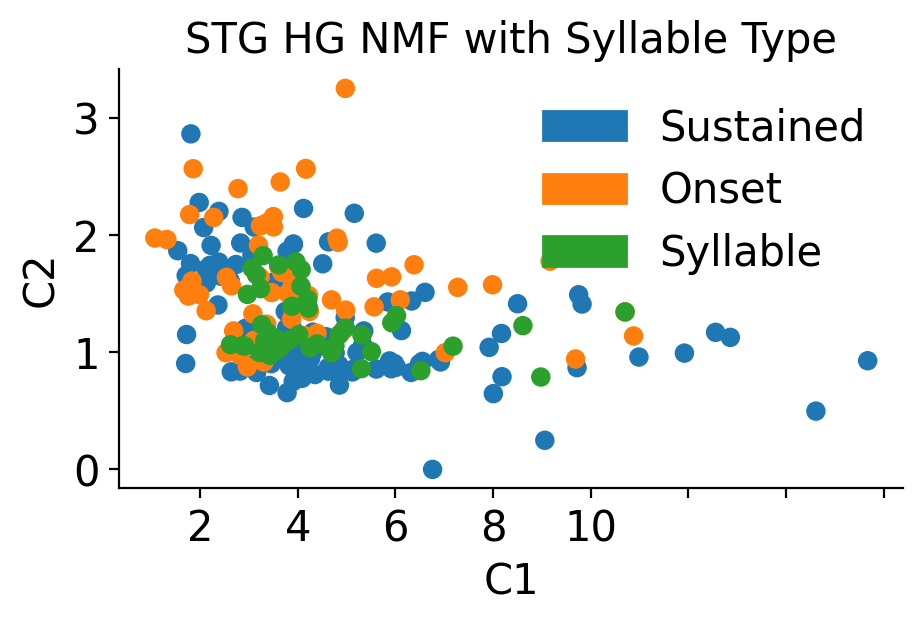

In [31]:
fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(4.5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

NMF_input = zscore_bseline(ecog_hg_mean)[:, 1500:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=2, init='random', random_state=0)
NMF_output = model.fit_transform(NMF_input)

axs.scatter(NMF_output[:, 0], NMF_output[:, 1], c=colors)
axs.legend(handles=handles, fontsize=15, frameon=False)
axs.set_xlabel('C1', fontsize=15)
axs.set_ylabel('C2', fontsize=15)
axs.set_title('STG HG NMF with Syllable Type', fontsize=15)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=15)
axs.set_xticklabels(axs.get_xticks().astype(int), fontsize=15)
sns.despine(ax=axs, top=True, right=True, left=False, bottom=False)

plt.show();

In [21]:
axs.get_yticks().astype(int)

array([-2,  0,  2,  4,  6,  8])

In [ ]:
np.as

In [12]:
NMF_input_full = zscore_bseline(ecog_hg_mean)[:, 1500:]
NMF_input_full = NMF_input_full - NMF_input_full.min()

model = NMF(n_components=2, init='random', random_state=0)
NMF_output = model.fit_transform(NMF_input_full)

plt.scatter(NMF_output[:, 0], NMF_output[:, 1], c=colors)
plt.legend(handles=handles)
plt.show();

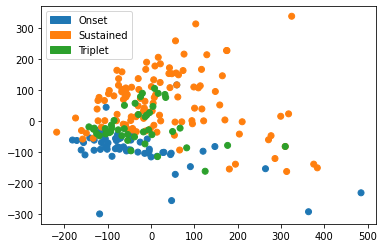

In [13]:
PCA_input = zscore_bseline(ecog_hg_mean)[:, 1500:3000]
pca = PCA(n_components=2)
PCA_output = pca.fit_transform(PCA_input)
plt.scatter(PCA_output[:, 0], PCA_output[:, 1], c=colors)
plt.legend(handles=handles)
plt.show();

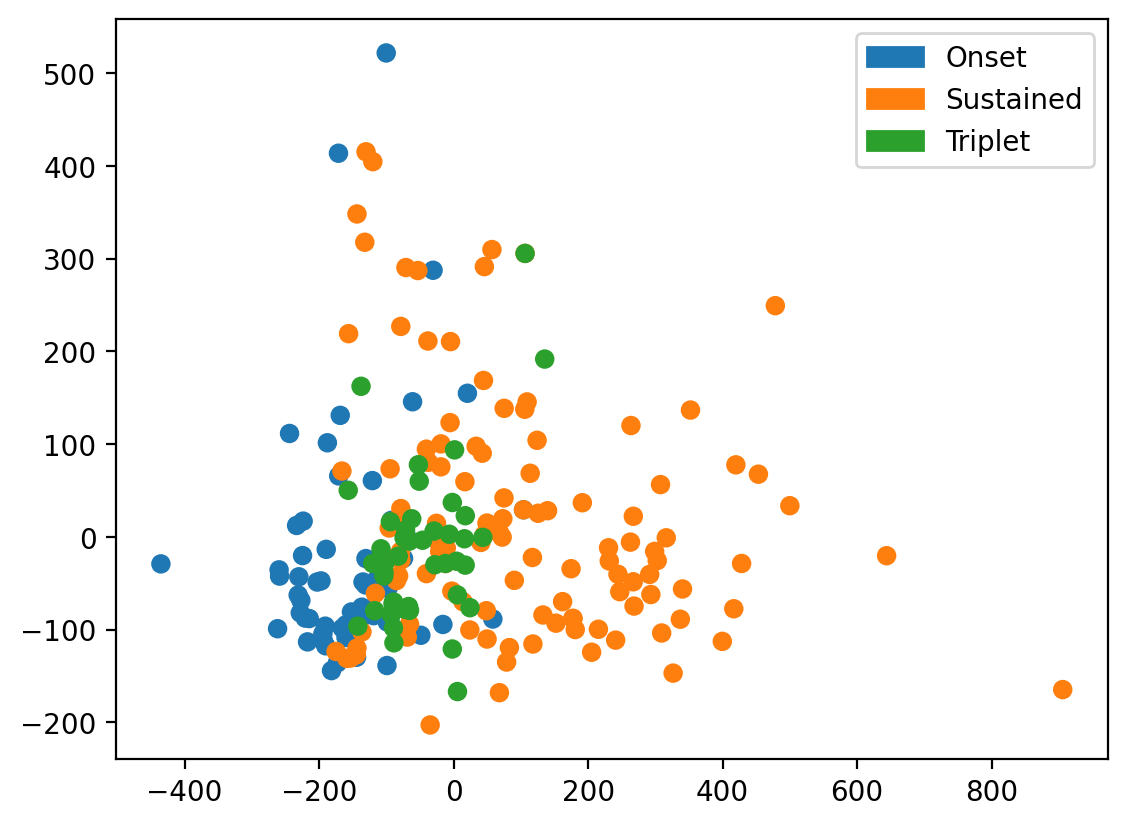

In [14]:
PCA_input_full = zscore_bseline(ecog_hg_mean)[:, 1500:]
pca = PCA(n_components=2)
PCA_output = pca.fit_transform(PCA_input_full)
plt.scatter(PCA_output[:, 0], PCA_output[:, 1], c=colors)
plt.legend(handles=handles)
plt.show();

In [15]:
fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(2.5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

NMF_input = zscore_bseline(ecog_hg_mean)[:, 1500:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=2, init='random', random_state=0)
NMF_output = model.fit_transform(NMF_input)

axs.scatter(NMF_output[:, 0], NMF_output[:, 1], c=colors)
axs.legend(handles=handles)
axs.set_xlabel('Component 1', fontsize=15)
axs.set_ylabel('Component 2', fontsize=15)
axs.set_title('Non-negative \nmatrix factorization', fontsize=15)
plt.show();

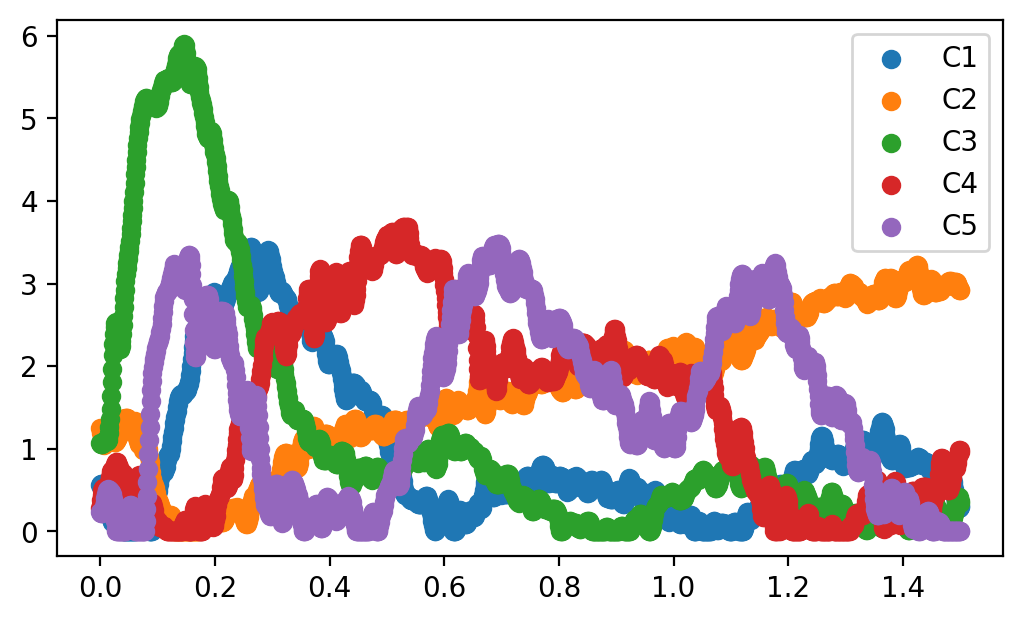

In [14]:
NMF_input = zscore_bseline(ecog_hg_mean)[:, 1500:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=5, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(0, 1.5, 1500)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')

plt.legend()
plt.show();

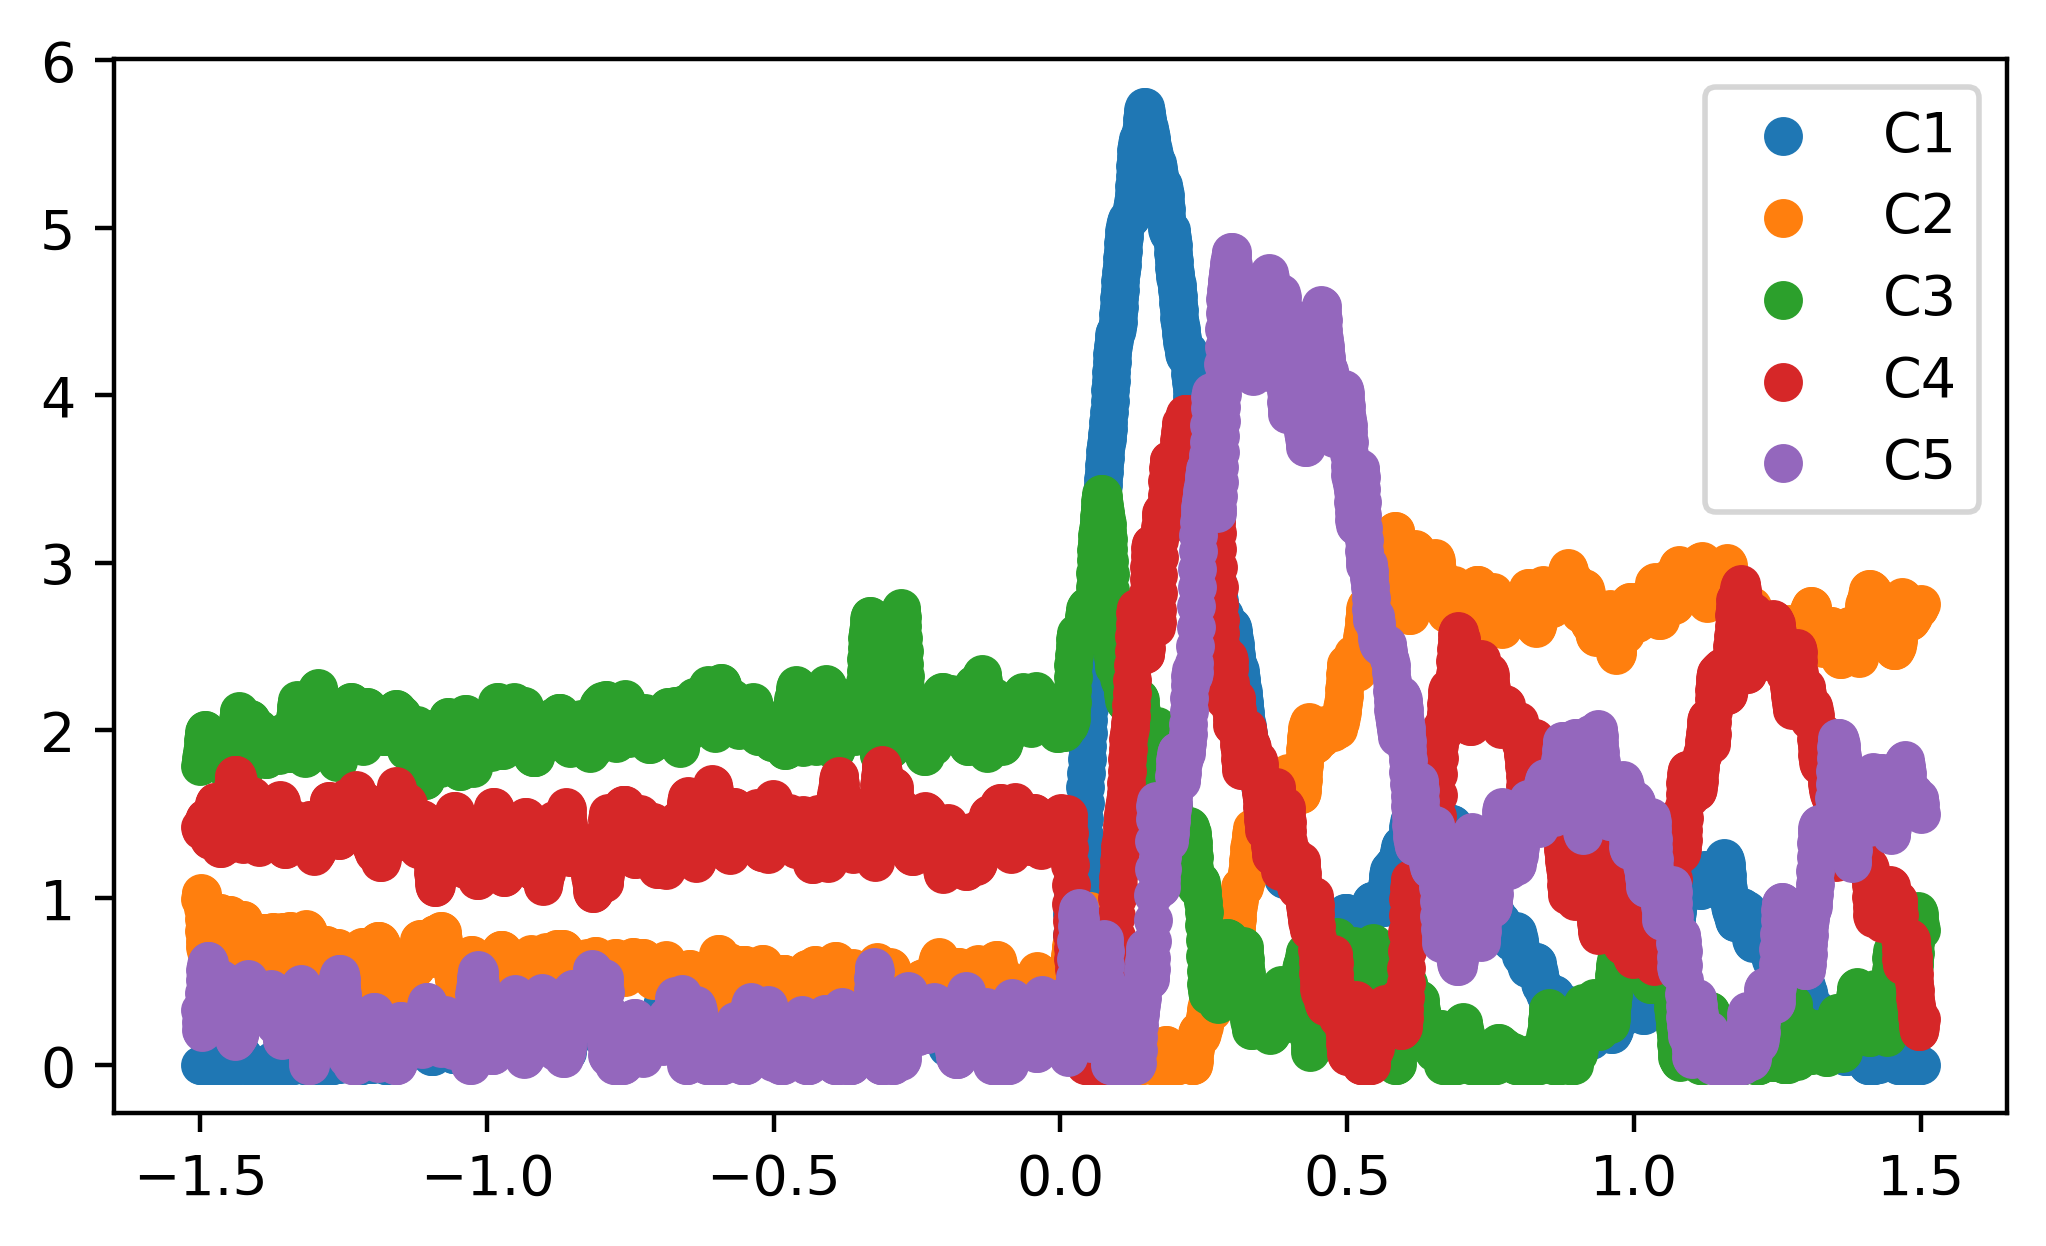

In [14]:
NMF_input = zscore_bseline(ecog_hg_mean)[:, :3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=5, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(-1.5, 1.5, 3000)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')

plt.legend()
plt.show();

In [20]:
model.components_


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99224812, 1.02028938, 1.03083566, ..., 2.73940814, 2.74537399,
        2.75085725],
       [1.7865606 , 1.80698947, 1.8352984 , ..., 0.87316801, 0.83725265,
        0.80447856],
       [1.41978842, 1.40785201, 1.4051952 , ..., 0.20313004, 0.23048548,
        0.27789436],
       [0.32807855, 0.25954884, 0.20997213, ..., 1.59074566, 1.55831039,
        1.50171686]])

In [23]:
NMF_input.shape

(220, 3000)

In [22]:
model.components_[2, :].shape

(3000,)

In [24]:
NMF_input = zscore_bseline(ecog_hg_mean)[:, :3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=5, init='random', random_state=0)
NMF_model = model.fit(NMF_input.T)


In [26]:
NMF_model.components_.shape

(5, 220)

In [13]:
NMF_input = ecog_hg_mean[:, :3000]/ecog_hg_mean[:, :1500].mean(axis=1)[:,None]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=5, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(-1.5, 1.5, 3000)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')

plt.legend()
plt.show();

In [26]:
NMF_model.components_[0]

array([1.20122067, 1.20495744, 1.21449774, ..., 0.10083659, 0.08483626,
       0.06670684])

In [ ]:
# Cross validation

In [15]:
def cv_matrices(X, fold):
    """
    Given a matrix X, the function creates 4 sets of train + test matrices
    where each train matrix is masked with zeros in 0.25 of the values, and the
    test matrix is masked zeros in 0.75 of them.
    X - numpy array
    fold - is an integer from 0-3.
    Returns the masked data and also the masks for train and test
    """
    # Create a dict with the slicing indices
    rows = X.shape[0]
    cols = X.shape[1]
    mid_rows = int(rows/2)
    mid_cols = int(cols/2)
    
    idx_dict = {
                0: [[0,mid_rows],[0, mid_cols]],
                1: [[0,mid_rows],[mid_cols, cols]],
                2: [[mid_rows, rows], [0, mid_cols]],
                3: [[mid_rows, rows], [mid_cols, cols]]
    }
    
    idexes = idx_dict[fold]
    # Create masks
    train_mask = np.full((rows, cols), 1)
    train_mask[idexes[0][0]:idexes[0][1], idexes[1][0]:idexes[1][1]] = 0
    test_mask = 1 - train_mask
    
    
    # Create X_train
    X_train = X.copy()
    X_train[train_mask==0] = 0
    
    # Create X_test
    X_test = X.copy()
    X_test[train_mask==1] = 0
        
    return X_train, X_test, train_mask, test_mask

In [21]:
def nmf_cv(X, latent_features, cycles=5, max_iter=25000, curRes_test_prev_init=99999):
    """
    Decompose X to A*Y
    """
    eps = 1e-12
    # Main mask: take only the non-nan location for loss calculation. Later on (per fold) we combine
    # the fold mask into one mask
    mask = ~np.isnan(X)
    # Fill in nan to 0
    X = np.nan_to_num(X)
    
    # fold_tups is where we collect the attributes from each fold
    fold_tups = []
    # Cross validation by 4 folds
    for f in range(4):
        X_train, X_test, train_mask, test_mask = cv_matrices(X, f)
        
        # Creates train and test masks with nulls (combined mask) - after that we have zeros in the fold's
        # Quartile (test area) and also in the original nulls in the train area 
        train_null_mask = mask * train_mask
        test_null_mask = mask * test_mask
        
        # Takes several cycles per fold to get the minimum loss between them, due to the random initiation
        result_list = []
        for j in range(cycles): 
            # initial matrices. A is random and Y is A\X.
            rows, columns = X_train.shape
            # A is the user matrix. Now we initiate it randomly
            A = np.sum(np.nan_to_num(np.diag(X_train)))*np.random.randn(rows, latent_features)/np.sqrt(latent_features) 
            A = np.maximum(A, eps)

            # Y is the product matrix. We initiate it is a way that given A, we get the minimum Frobenius Form
            Y = np.linalg.lstsq(A, X_train)[0]
            Y = np.maximum(Y, eps)
            
            # Get only the train values
            masked_X = train_null_mask * X_train
            
            # Set test residual at a high value and train at 0
            curRes_test_prev = curRes_test_prev_init
            curRes_test_best = curRes_test_prev_init
            curRes_train_prev = 0
  
            train_list = [] # per cycle
            test_list = [] # per cycle
            
            # Initialize the resulted X (per cycle)
            X_est_prev = None
            X_est = np.dot(A, Y)

            # This for loop is the main algorithm procedure, updates the matrix till minimum residual or till break
            i = -1
            while X_est_prev is None or fit_residual > 1e-9:
                i += 1
                X_est_prev = X_est
                # Update A
                top = np.dot(masked_X, Y.T)
                bottom = (np.dot((train_null_mask * np.dot(A, Y)), Y.T)) + eps
                A *= top / bottom
                A = np.maximum(A, eps)
                # Update Y
                top = np.dot(A.T, masked_X)
                bottom = np.dot(A.T, train_null_mask * np.dot(A, Y)) + eps
                Y *= top / bottom
                Y = np.maximum(Y, eps)
                # New X matrix based on updated A and Y
                X_est = np.dot(A, Y)
                                     
                err = train_null_mask * (X_est_prev - X_est)
                fit_residual = np.sqrt(np.sum(err ** 2))
                if i > max_iter:
                    break
                    
            # Collect results per cycle
            result_list.append((A, Y, curRes_train_prev, curRes_test_prev, i, train_list, test_list))

        result_list_sorted = list(sorted(result_list, key=lambda x: x[2]))
        # Get all the attributes of the best cycle per fold
        fold_best_curRes_test = result_list_sorted[0][3]
        fold_best_curRes_train = result_list_sorted[0][2]
        fold_A = result_list_sorted[0][0]
        fold_Y = result_list_sorted[0][1]
        fold_tup = (fold_A, fold_Y, fold_best_curRes_train, fold_best_curRes_test)
        fold_tups.append(fold_tup)
        
        
    # Get avg train/test score from all folds
    train_mean = np.mean([x[2] for x in fold_tups])
    test_mean = np.mean([x[3] for x in fold_tups])
    # Get all combinaitions of A and Y
    mean_A = [x[0] for x in fold_tups]
    mean_Y = [x[1] for x in fold_tups]
    
    return train_mean, test_mean, mean_A, mean_Y

In [24]:
NMF_input = zscore_bseline(ecog_hg_mean)[:, 1500:3000]
NMF_input = NMF_input - NMF_input.min()

orig_matrix_round = NMF_input
orig_matrix_round_plus = NMF_input

In [25]:
n_iter = 100
k_tup_list = []
# k must be lower than the min of (columns/rows)
k_max = min(orig_matrix_round_plus.shape[0], orig_matrix_round_plus.shape[1])
for k in range(2,k_max):     

    train_mean, test_mean, final_As, final_Ys = nmf_cv(orig_matrix_round_plus, k, max_iter=n_iter)
    k_tup = (train_mean, test_mean, final_As, final_Ys, k)
    k_tup_list.append(k_tup)

NameError: name 'nmf_cv' is not defined

In [26]:
test_err = [tup[1] for tup in k_tup_list]
min_test_err = np.min(test_err)
min_test_err_idx = test_err.index(min_test_err)
# Extract the run and its attributes
best_run = k_tup_list[min_test_err_idx]
best_k = min_test_err_idx + 2 


ValueError: zero-size array to reduction operation minimum which has no identity

In [54]:
k_tup_list[min_test_err_idx]

(0.0,
 99999.0,
 [array([[6.22322300e+02, 7.67267017e+02],
         [2.04184785e-12, 1.39535682e+03],
         [2.69581559e-12, 1.37109993e+03],
         [4.31418302e+02, 1.00617955e+03],
         [1.13486138e-12, 1.33464237e+03],
         [3.21801912e+02, 1.63328785e+02],
         [3.85145954e+03, 1.05807621e-11],
         [8.70131891e+02, 2.77815184e+02],
         [1.43619219e-11, 1.55359685e+03],
         [8.68694180e-12, 2.16473839e+03],
         [2.12250041e-12, 1.48642352e+03],
         [7.98432218e+02, 8.70644115e+02],
         [8.67056981e+02, 9.97464056e+02],
         [2.47277259e+03, 2.48759001e-12],
         [6.12411278e+02, 9.00631075e+02],
         [4.91657854e-12, 1.93236658e+03],
         [1.07218660e-12, 1.06562743e+03],
         [1.94642860e+02, 9.95930384e+02],
         [2.94783488e-12, 1.30104791e+03],
         [8.18321200e+02, 1.00094338e+03],
         [2.33180156e+03, 2.09890968e-12],
         [2.23867339e+03, 1.47192687e-12],
         [2.26687601e+03, 4.23161994e-

In [38]:
best_k

2

In [39]:
As = k_tup_list[3][2]
Ys = k_tup_list[3][3]
# We pick one A and one Y
A_0 = As[0]
Y_0 = Ys[0]

In [19]:
def nmf(X, max_iter, init_A, init_Y, cycles=5):
    """
    Decompose X to A*Y
    """
    eps = 1e-7
    # mask: take only the non-nan location for loss calculation
    mask = ~np.isnan(X)
    # Fill in nan to 0
    X = np.nan_to_num(X)
    # Takes several cycles to get the minimum loss between them
    result_list = []
    for j in range(cycles): 
        # A as we captured
        A =init_A
        A = np.maximum(A, eps)

        # Y as we captured
        Y = init_Y
        Y = np.maximum(Y, eps)

        masked_X = mask * X
        X_est_prev = np.dot(A, Y)
    
        for i in tqdm(range(1, max_iter + 1), "cycle_{}".format(j)):
            # ===== updates =====
            top = np.dot(masked_X, Y.T)
            bottom = (np.dot((mask * np.dot(A, Y)), Y.T)) + eps
            A *= top / bottom
            A = np.maximum(A, eps)

            top = np.dot(A.T, masked_X)
            bottom = np.dot(A.T, mask * np.dot(A, Y)) + eps
            Y *= top / bottom
            Y = np.maximum(Y, eps)

            # ==== evaluation ====
            if i % 5 == 0 or i == 1 or i == max_iter:
                print('Iteration {}:'.format(i))
                X_est = np.dot(A, Y)
                err = mask * (X_est_prev - X_est)
                fit_residual = np.sqrt(np.sum(err ** 2))
                X_est_prev = X_est

                curRes = np.linalg.norm(mask * (X - X_est), ord='fro')
                print('fit residual', np.round(fit_residual, 4))
                print('total residual', np.round(curRes, 4))

        result_list.append((A, Y, curRes))
        
    result_list_sorted = list(sorted(result_list, key=lambda x: x[2]))    
        
    return result_list_sorted[0][0], result_list_sorted[0][1], result_list_sorted[0][2]

In [20]:
from tqdm import tqdm


In [21]:
# Get the support matrices 
A, Y, err = nmf(orig_matrix_round_plus, 10000, A_0, Y_0)
# New matrix
new_matrix = np.dot(A,Y)

NameError: name 'orig_matrix_round_plus' is not defined

In [22]:
# Original matrix for comparison
orig_matrix_round[:5,:5]

NameError: name 'orig_matrix_round' is not defined

In [23]:

# New matrix
(np.nan_to_num(np.isnan(orig_matrix_round_plus))*new_matrix)[:5,:5]

NameError: name 'orig_matrix_round_plus' is not defined

In [50]:
# Original matrix
(np.nan_to_num(np.isnan(orig_matrix_round_plus))*np.nan_to_num(orig_matrix_round))[:5,:5]


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [52]:
orig_matrix_round_miss = orig_matrix_round

In [53]:
# Need to subtruct 1 since we added 1 before the NMF
new_matrix_reduced = new_matrix - 1
# Zeroing the nulls in the original table, and adding only the relevant values from the new matrix based 
# on the mask
completed_table = np.nan_to_num(orig_matrix_round_miss) + new_matrix_reduced * null_mask


NameError: name 'null_mask' is not defined

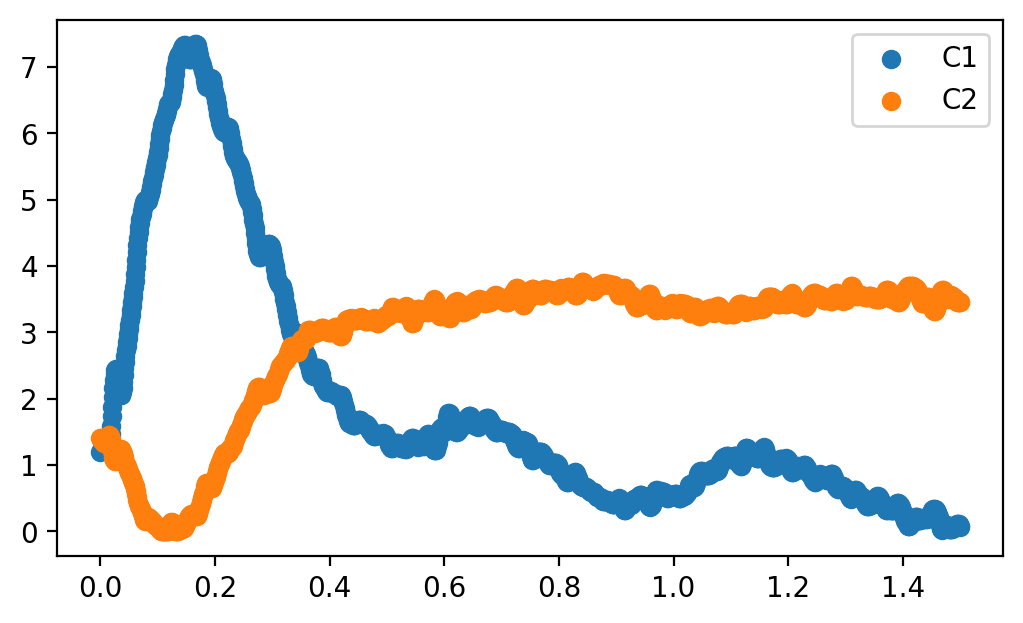

In [27]:
model = NMF(n_components=2, init='random', random_state=0)
NMF_model = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(0, 1.5, 1500)

plt.scatter(x=x_lab, y=NMF_model.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model.components_[1], label='C2')
#plt.scatter(x=x_lab, y=NMF_model.components_[2], label='C3')
#plt.scatter(x=x_lab, y=NMF_model.components_[3], label='C4')
#plt.scatter(x=x_lab, y=NMF_model.components_[4], label='C5')

plt.legend()
plt.show();

In [29]:
NMF_model.components_[0].shape

(1500,)

In [38]:
leveles

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
output_df = pd.DataFrame({'C1':NMF_output[:, 0], 'C2':NMF_output[:, 1], 'color':colors, 'level':leveles})
output_df_mean = output_df.groupby(['level']).mean()
output_df_mean['color'] = output_df['color'].unique()
output_df_mean['time'] = item

axs.scatter(output_df_mean['C1'], output_df_mean['C2'], c=output_df_mean['color'])

In [41]:
NMF_output[:, 0].shape
leveles.shape

(220,)

(220,)

In [39]:
output_df = pd.DataFrame({'C1':NMF_output[:, 0], 'C2':NMF_output[:, 1], 'level':leveles})


fig = px.line_3d(x=NMF_model.components_[0], y=NMF_model.components_[1], z=np.linspace(0, 1.5, 1500), 
                 color="Category", color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c'])
fig.update_layout(showlegend=False)


fig.update_layout(width=500, height=500, margin=dict(r=5, b=5, l=5, t=5))
fig.update_layout(yaxis = dict(tickfont = dict(size=15)))
fig.update_layout(xaxis = dict(tickfont = dict(size=15)))
#fig.update_layout(zaxis = dict(tickfont = dict(size=15)))
fig.show();

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'color' is of type str or int.

In [28]:
output_df_mean = output_df.groupby(['level']).mean()
output_df_mean['color'] = output_df['color'].unique()
output_df_mean['time'] = item
output_df_mean

TypeError: agg function failed [how->mean,dtype->object]

TypeError: agg function failed [how->mean,dtype->object]

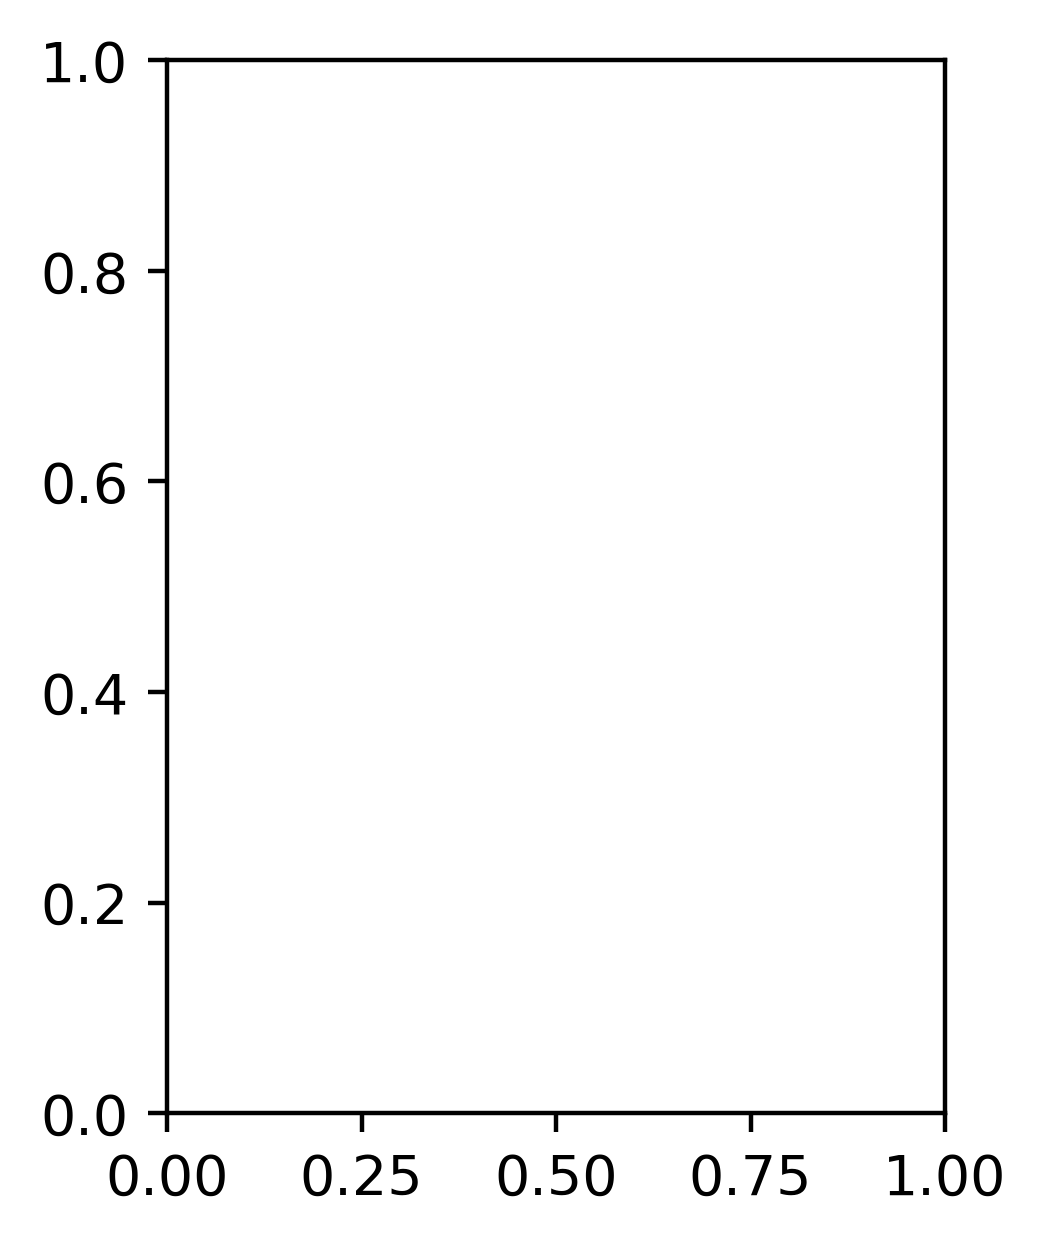

In [17]:
fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(2.5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

item = 0
NMF_input = zscore_bseline(ecog_hg_mean)[:, item+1500:item+1501]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=2, init='random', random_state=0)
NMF_output = model.fit_transform(NMF_input)

output_df = pd.DataFrame({'C1':NMF_output[:, 0], 'C2':NMF_output[:, 1], 'color':colors, 'level':leveles})
output_df_mean = output_df.groupby(['level']).mean()
output_df_mean['color'] = output_df['color'].unique()
output_df_mean['time'] = item

axs.scatter(output_df_mean['C1'], output_df_mean['C2'], c=output_df_mean['color'])
axs.legend(handles=handles)
axs.set_xlabel('Component 1', fontsize=15)
axs.set_ylabel('Component 2', fontsize=15)
axs.set_title('Non-negative \nmatrix factorization', fontsize=15)
plt.show();

In [12]:
item = 0
NMF_input = zscore_bseline(ecog_hg_mean)[:, item+1500:item+1501]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=2, init='random', random_state=0)
NMF_output = model.fit_transform(NMF_input)

output_df = pd.DataFrame({'Component 1':NMF_output[:, 0], 
                          'Component 2':NMF_output[:, 1], 'color':colors, 'level':leveles})
output_df_mean_all = output_df.groupby(['level']).mean()
output_df_mean_all['color'] = output_df['color'].unique()
output_df_mean_all['Time (ms)'] = item
output_df_mean_all['Category'] = categories

for item in range(1, 5000-30):
    NMF_input = zscore_bseline(ecog_hg_mean)[:, item:item+1]
    NMF_input = NMF_input - NMF_input.min()

    model = NMF(n_components=2, init='random', random_state=0)
    NMF_output = model.fit_transform(NMF_input)

    output_df = pd.DataFrame({'Component 1':NMF_output[:, 0], 
                              'Component 2':NMF_output[:, 1], 'color':colors, 'level':leveles})
    output_df_mean = output_df.groupby(['level']).mean()
    output_df_mean['color'] = output_df['color'].unique()
    output_df_mean['Time (ms)'] = item
    output_df_mean['Category'] = categories

    output_df_mean_all = output_df_mean_all.append(output_df_mean, ignore_index=1)

TypeError: agg function failed [how->mean,dtype->object]

In [13]:
fig = px.line_3d(output_df_mean_all, 
                 x="Component 1", y="Component 2", z="Time (ms)", 
                 color="Category", color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c'])
fig.update_layout(showlegend=False)


fig.update_layout(width=500, height=500, margin=dict(r=5, b=5, l=5, t=5))
fig.update_layout(yaxis = dict(tickfont = dict(size=15)))
fig.update_layout(xaxis = dict(tickfont = dict(size=15)))
#fig.update_layout(zaxis = dict(tickfont = dict(size=15)))
fig.show();

NameError: name 'output_df_mean_all' is not defined

In [14]:
fig = px.line_3d(output_df_mean_all, 
                 x="Component 1", y="Component 2", z="Time (ms)", 
                 color="Category", color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c'])
fig.update_layout(showlegend=False)


fig.update_layout(width=500, height=500, margin=dict(r=5, b=5, l=5, t=5))

camera = dict(
    up=dict(x=1, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.25, y=1.25, z=1.25)
)

fig.update_layout(scene_camera=camera)
fig.show();

NameError: name 'output_df_mean_all' is not defined

In [15]:
fig = px.line_3d(output_df_mean_all, 
                 x="Component 1", y="Component 2", z="Time (ms)", 
                 color="Category", color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c'])
fig.update_layout(showlegend=False)


fig.update_layout(width=500, height=500, margin=dict(r=5, b=5, l=5, t=5))


fig.view_init(30, angle)
fig.show();

NameError: name 'output_df_mean_all' is not defined

In [11]:
import plotly.io as pio

In [42]:
pio.write_image(fig, "../plots/fig3d.svg", width=2.5*200, height=2.5*200, scale=1)

In [13]:
fig.write_image("../plots/fig3d.svg")

NameError: name 'output_df_mean_all' is not defined

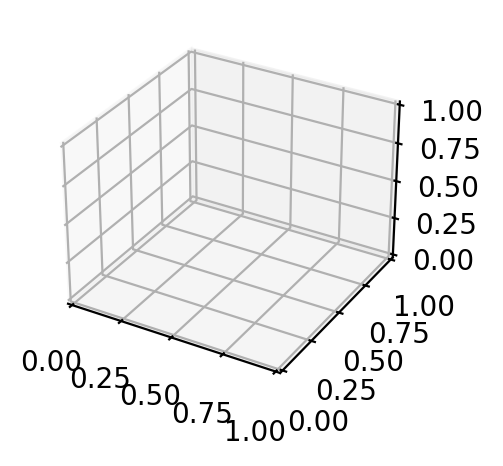

In [16]:
fig = plt.figure(figsize=(2.5, 2.5), dpi=200)
ax = fig.add_subplot(projection='3d')
x = output_df_mean_all['Component 1']
y = output_df_mean_all['Component 2']
z = output_df_mean_all['Time (ms)']
color = output_df_mean_all['color']
ax.scatter(x, y, z, color=color, s=0.1)
ax.set_xlabel("Component 1", fontsize=15)
ax.set_ylabel("Component 2", fontsize=15)
ax.set_zlabel("Time (ms)", fontsize=15)
#plt.yticklabels(plt.get_yticks(), fontsize=15)
#plt.xticklabels(plt.get_xticks(), fontsize=15)
#plt.zticklabels(plt.get_zticks(), fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.view_init(10, -120)
plt.savefig("../plots/fig3d.svg", format = 'svg', dpi=200);


In [84]:
fig = plt.figure(figsize=(2.5, 2.5), dpi=200)
ax = fig.add_subplot(projection='3d')
x = output_df_mean_all['Component 1']
y = output_df_mean_all['Component 2']
z = output_df_mean_all['Time (ms)']
color = output_df_mean_all['color']
ax.scatter(x, y, z, color=color, s=0.1)
ax.set_xlabel("Component 1", fontsize=15)
ax.set_ylabel("Component 2", fontsize=15)
ax.set_zlabel("Time (ms)", fontsize=15)
#plt.yticklabels(plt.get_yticks(), fontsize=15)
#plt.xticklabels(plt.get_xticks(), fontsize=15)
#plt.zticklabels(plt.get_zticks(), fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.view_init(10, -120)
plt.savefig("../plots/fig3d.svg", format = 'svg', dpi=200);


In [80]:
fig = plt.figure(figsize=(2.5, 2.5), dpi=200)
ax = fig.add_subplot(projection='3d')
x = output_df_mean_all['Component 1']
y = output_df_mean_all['Component 2']
z = output_df_mean_all['Time (ms)']
color = output_df_mean_all['color']
ax.scatter(x, y, z, color=color, s=0.1)
ax.set_xlabel("Component 1", fontsize=15)
ax.set_ylabel("Component 2", fontsize=15)
ax.set_zlabel("Time (ms)", fontsize=15)
#plt.yticklabels(plt.get_yticks(), fontsize=15)
#plt.xticklabels(plt.get_xticks(), fontsize=15)
#plt.zticklabels(plt.get_zticks(), fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.view_init(20, -120)
plt.show();

Text(0.5, 0, 'x')

Text(0.5, 0, 'y')

Text(0.5, 0, 'z')

TypeError: view_init() takes from 1 to 3 positional arguments but 4 were given

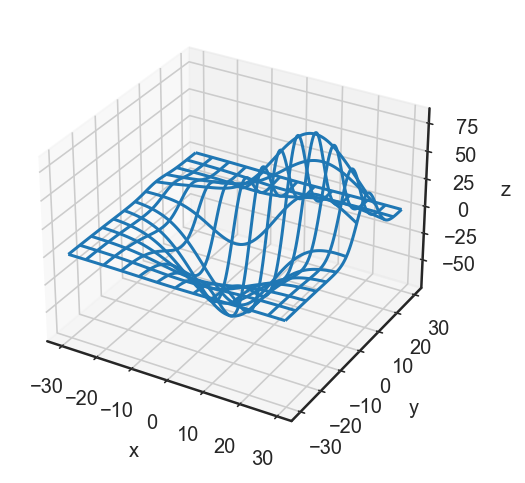

In [57]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some example data and plot a basic wireframe.
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

# Set the axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Rotate the axes and update
for angle in range(0, 360*4 + 1):
    # Normalize the angle to the range [-180, 180] for display
    angle_norm = (angle + 180) % 360 - 180

    # Cycle through a full rotation of elevation, then azimuth, roll, and all
    elev = azim = roll = 0
    if angle <= 360:
        elev = angle_norm
    elif angle <= 360*2:
        azim = angle_norm
    elif angle <= 360*3:
        roll = angle_norm
    else:
        elev = azim = roll = angle_norm

    # Update the axis view and title
    ax.view_init(elev, azim, roll)
    plt.title('Elevation: %d°, Azimuth: %d°, Roll: %d°' % (elev, azim, roll))

    plt.draw()
    plt.pause(.001)

In [75]:
ecog_hg_z = zscore_bseline(ecog_hg_mean)
NMF_out_all = []
for item in range(zscore_bseline(ecog_hg_mean).shape[1]):
    NMF_input = ecog_hg_z[:, item]
    NMF_input = NMF_input.reshape((NMF_input.shape[0], 1))
    NMF_input = NMF_input - NMF_input.min()

    model = NMF(n_components=2, init='random', random_state=0)
    NMF_output = model.fit_transform(NMF_input)
    NMF_out_all.append([NMF_output[:, 0].mean(), NMF_output[:, 1].mean()])
    
NMF_out_all = np.array(NMF_out_all)

In [70]:
NMF_out_all

[[1.2834281825104814, 1.0234179895772133],
 [1.2978631066021975, 1.0291180869994236],
 [1.3299442437283424, 1.0595400980881151],
 [1.321992448989991, 1.0557887035717777],
 [1.3063148546231078, 1.0476320701624764],
 [1.2915159076070966, 1.0397675819786947],
 [1.2634553940147903, 1.0176507500995609],
 [1.2212690511253124, 0.9789825982274194],
 [1.1747287808827958, 0.9304188033054123],
 [1.1567786318386695, 0.915858799468234],
 [1.1666730067107245, 0.9281763926398584],
 [1.1786964005954303, 0.9381176182174414],
 [1.1859160875550634, 0.937578170696979],
 [1.2316659945925628, 0.9845288552010962],
 [1.2866001599372132, 1.0353673032452644],
 [1.3010565654405706, 1.0460249046329888],
 [1.2859929900532319, 1.0321810133033806],
 [1.2628532950114741, 1.0135242257167862],
 [1.2300269048186878, 0.9846558559013219],
 [1.175872263028683, 0.9395888622898259],
 [1.1016759791032802, 0.8794049090013043],
 [1.0535949957566093, 0.8443868114350347],
 [1.0278955162059242, 0.8223323120784176],
 [1.03588040654

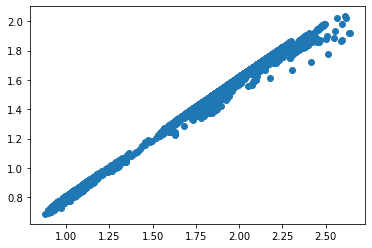

In [79]:
plt.scatter(NMF_out_all[:, 0], NMF_out_all[:, 1])

In [76]:
NMF_out_all.shape

(5000, 2)

In [38]:
import plotly.express as px


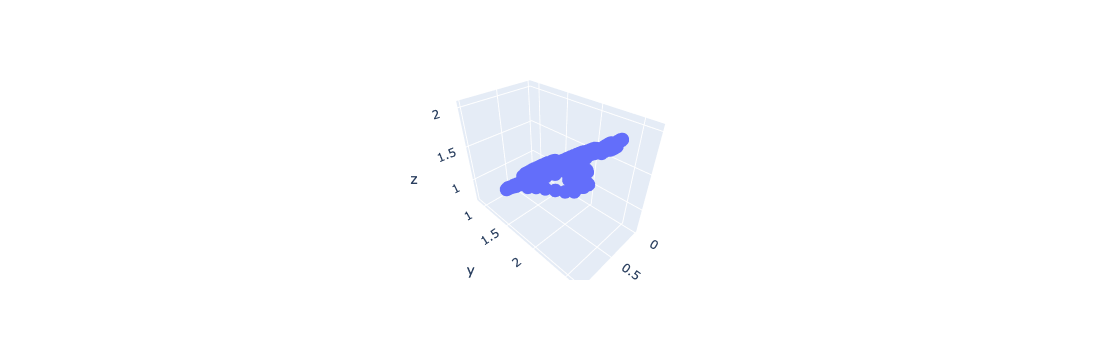

In [83]:
fig = px.scatter_3d(x=np.linspace(0, 1, 5000), y=NMF_out_all[:, 0], z=NMF_out_all[:, 1])
fig.show();

In [84]:
NMF_out_all[:, 0].shape

(5000,)